In [1]:
!pip install kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle  datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [01:45<00:00, 24.5MB/s]
100% 2.29G/2.29G [01:45<00:00, 23.4MB/s]


MessageError: Error: credential propagation was unsuccessful

In [7]:
!unzip /content/chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [8]:
import os

In [9]:
os.listdir('/content/chest_xray/train')

['PNEUMONIA', 'NORMAL']

In [10]:
os.listdir('/content/chest_xray/test')

['PNEUMONIA', 'NORMAL']

In [11]:
os.listdir('/content/chest_xray/val')

['PNEUMONIA', 'NORMAL']

In [12]:
import PIL

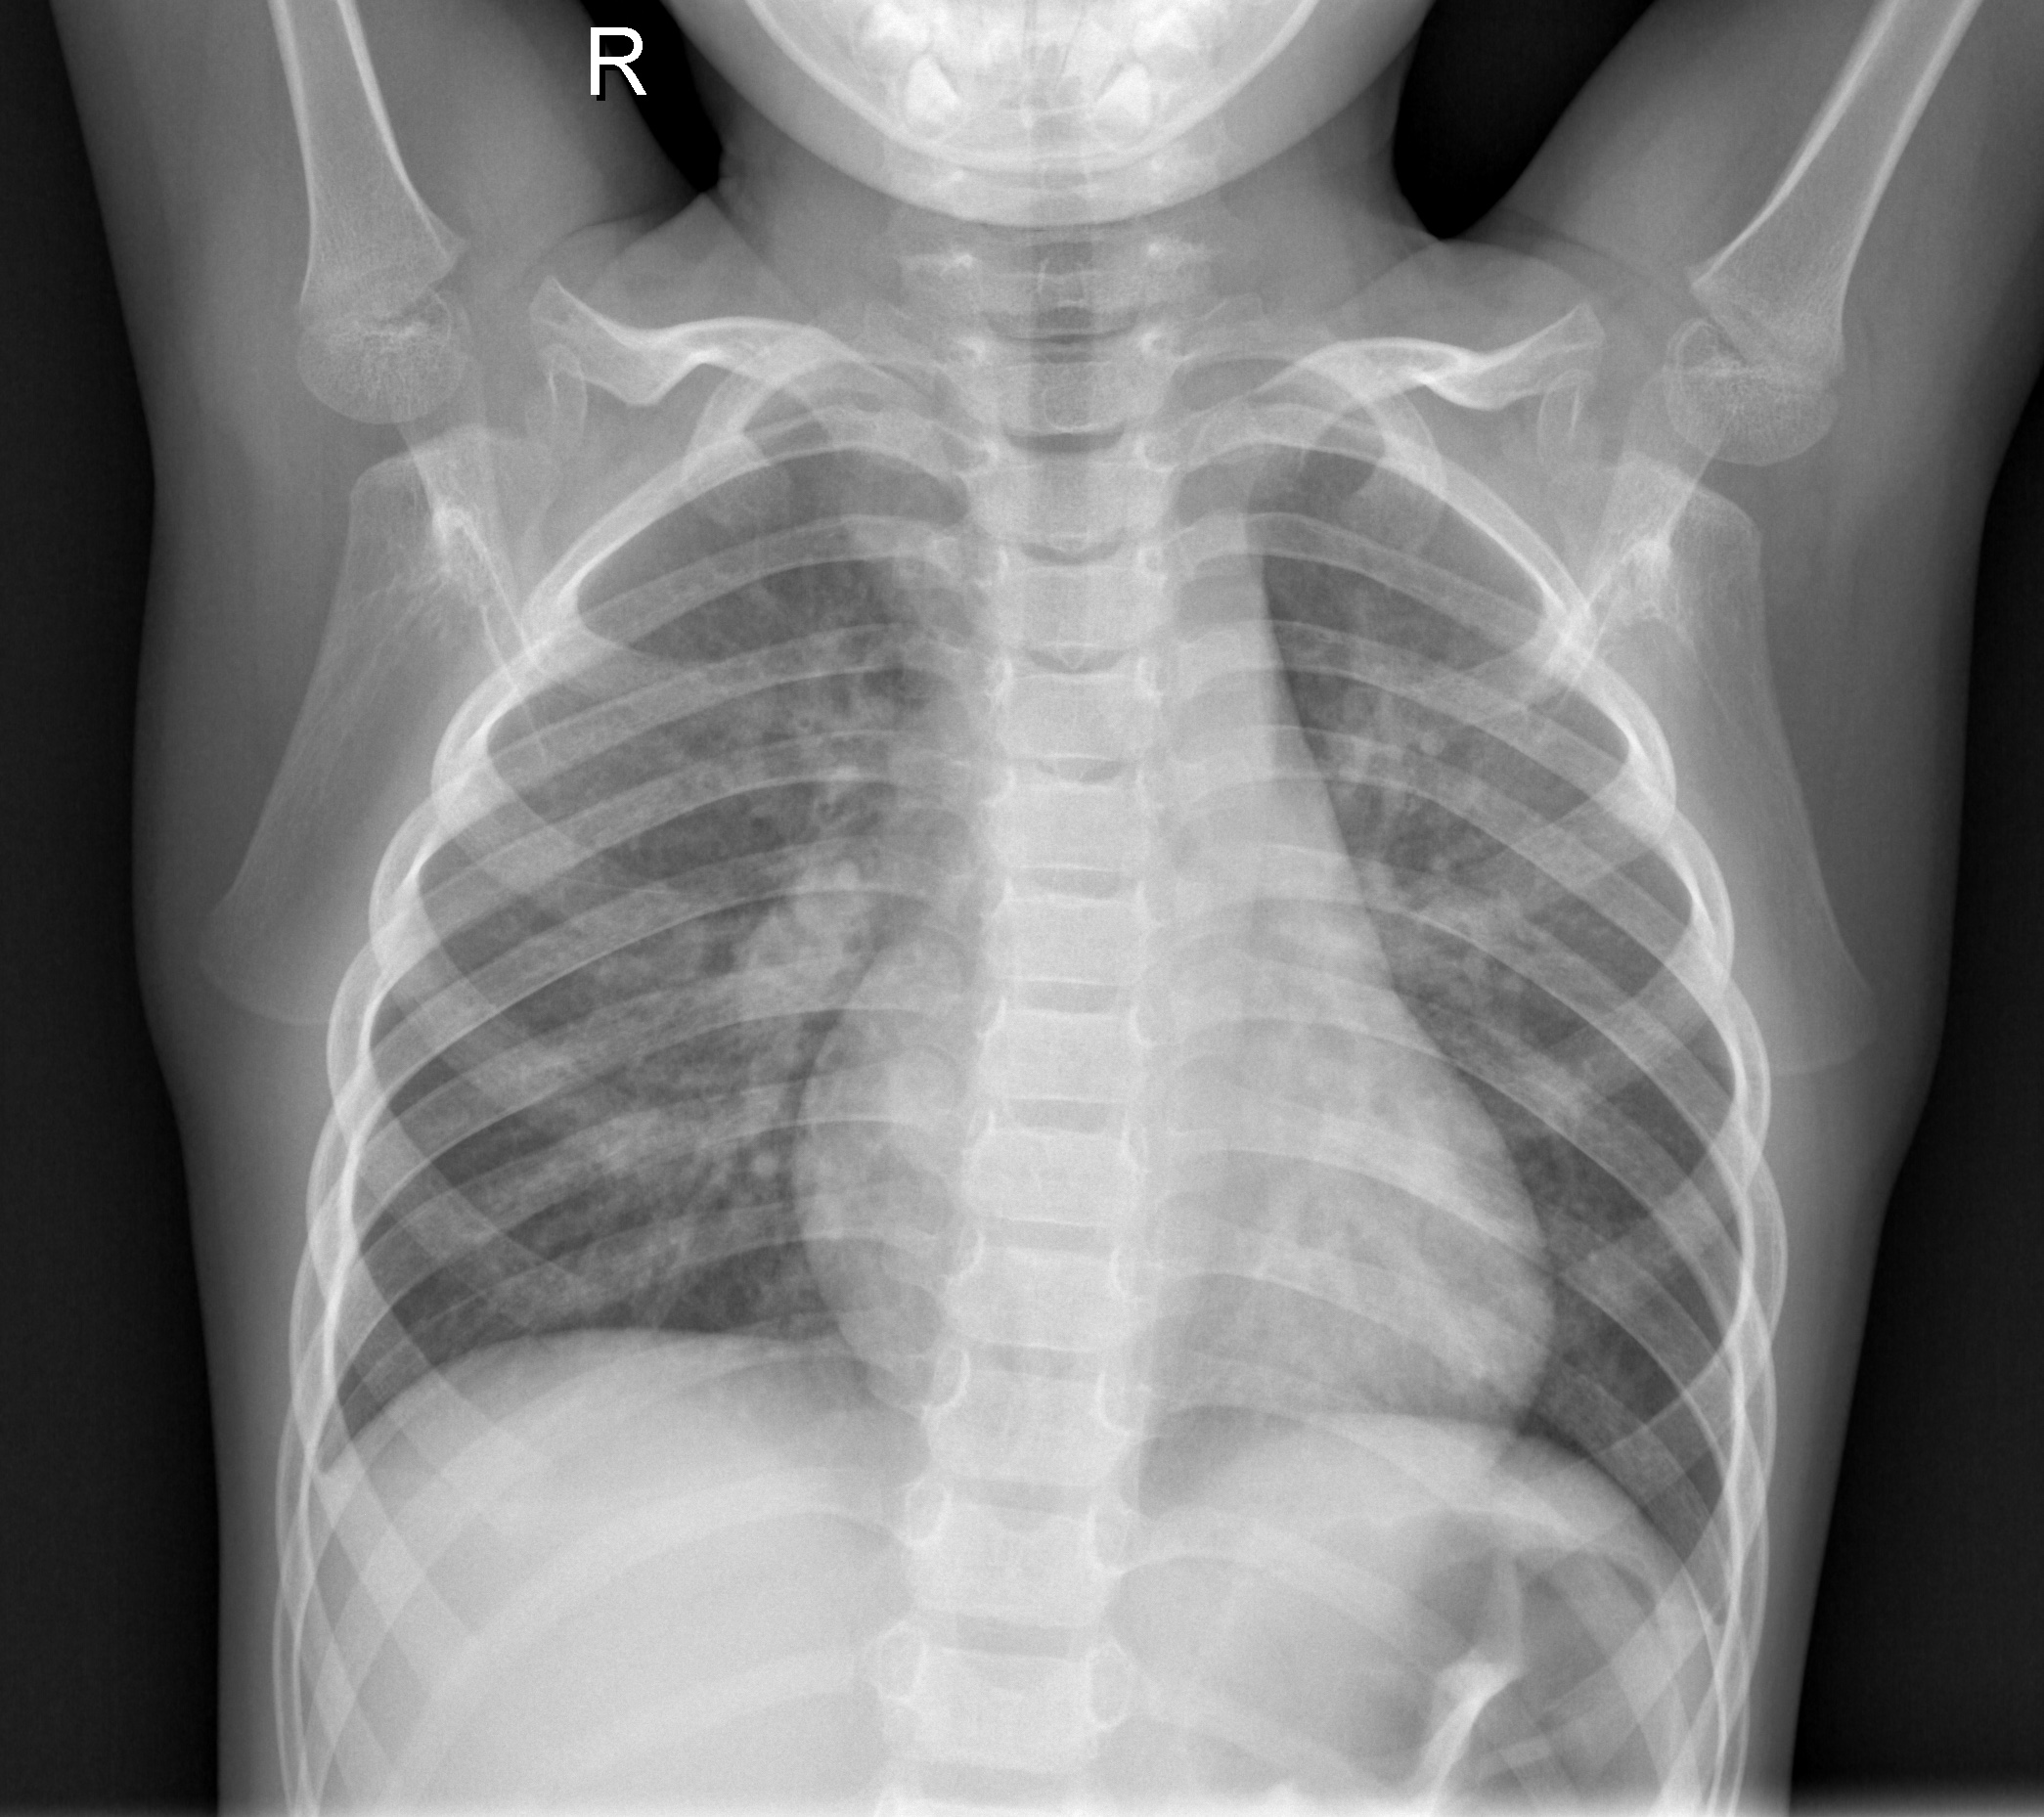

In [15]:
PIL.Image.open('/content/chest_xray/train/NORMAL/IM-0115-0001.jpeg')

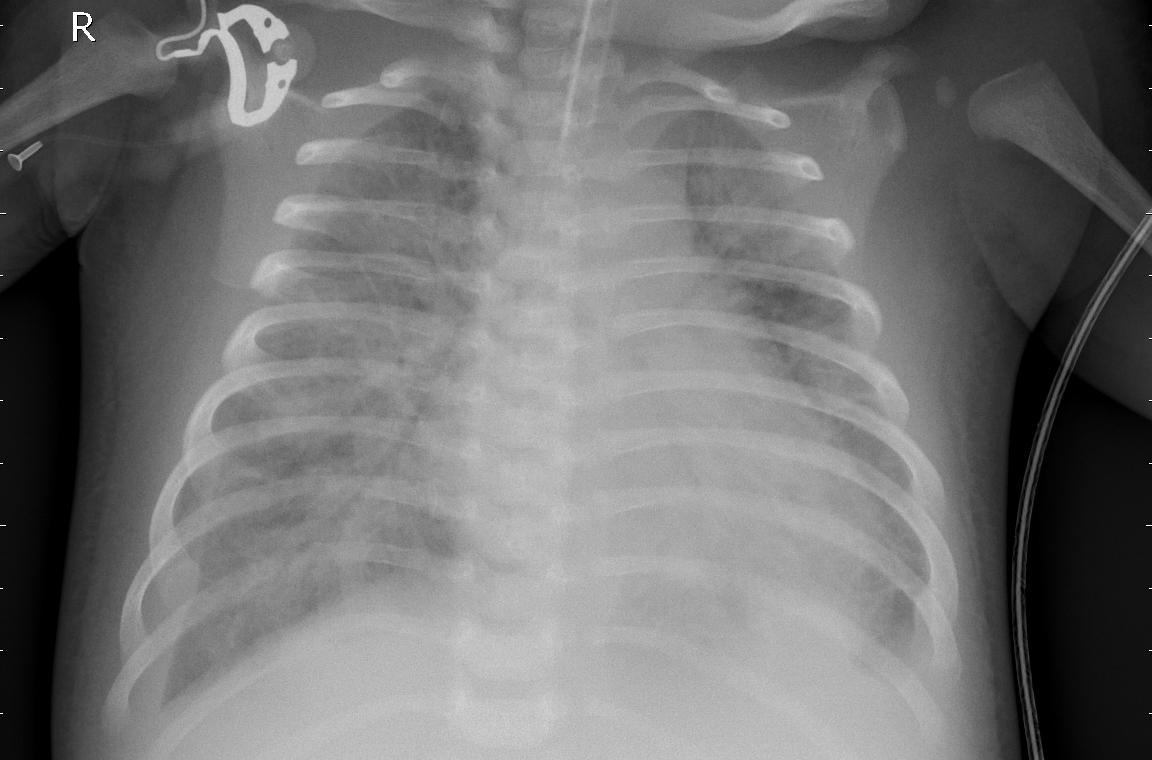

In [16]:
PIL.Image.open('/content/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg')

In [13]:
import tensorflow as tf

In [14]:
traning_ds =  tf.keras.utils.image_dataset_from_directory(
    '/content/chest_xray/train',

    image_size=(150, 150),
    batch_size=64,
    label_mode='categorical',
    shuffle=True,



)

Found 5216 files belonging to 2 classes.


In [15]:
test_ds =  tf.keras.utils.image_dataset_from_directory(
    '/content/chest_xray/test',

    image_size=(150, 150),
    batch_size=64,
    label_mode='categorical',
    shuffle=True,



)

Found 624 files belonging to 2 classes.


In [16]:
no_batch=tf.data.experimental.cardinality(test_ds)    # number of batches
Test_ds=test_ds.take(no_batch//5)  # take part for testing
val_ds=test_ds.skip(no_batch//5)   # take for valdation after make model

In [21]:
from tensorflow.python.data.ops.dataset_ops import AUTOTUNE
AUTOTUNE=tf.data.AUTOTUNE

training_ds = traning_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
Test_ds =Test_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds= val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [28]:
model = tf.keras.Sequential([


    tf.keras.layers.Dense(32, input_shape=(150,150,3), activation='relu'),
    tf.keras.layers.Dense(64,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(64,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(64,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),

    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Dense(64,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(64,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),

    tf.keras.layers.Dropout(.25),

    tf.keras.layers.Dense(2, activation='softmax'),

])














In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 150, 150, 32)      128       
                                                                 
 dense_21 (Dense)            (None, 150, 150, 64)      2112      
                                                                 
 dense_22 (Dense)            (None, 150, 150, 64)      4160      
                                                                 
 dense_23 (Dense)            (None, 150, 150, 64)      4160      
                                                                 
 dropout_4 (Dropout)         (None, 150, 150, 64)      0         
                                                                 
 dense_24 (Dense)            (None, 150, 150, 64)      4160      
                                                                 
 dense_25 (Dense)            (None, 150, 150, 64)     

In [35]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.001),loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics='accuracy')

In [36]:
history=model.fit(traning_ds,epochs=15,validation_data=val_ds)

Epoch 1/15
82/82 [==============================] - 43s 452ms/step - loss: 54.4368 - accuracy: 0.7577 - val_loss: 13.1429 - val_accuracy: 0.6290
Epoch 2/15
82/82 [==============================] - 41s 461ms/step - loss: 9.8968 - accuracy: 0.9135 - val_loss: 8.4670 - val_accuracy: 0.6310
Epoch 3/15
82/82 [==============================] - 40s 450ms/step - loss: 6.7027 - accuracy: 0.9049 - val_loss: 5.8769 - val_accuracy: 0.8407
Epoch 4/15
82/82 [==============================] - 39s 442ms/step - loss: 5.1747 - accuracy: 0.9038 - val_loss: 4.8433 - val_accuracy: 0.8367
Epoch 5/15
82/82 [==============================] - 39s 442ms/step - loss: 4.2016 - accuracy: 0.9243 - val_loss: 4.0845 - val_accuracy: 0.7944
Epoch 6/15
82/82 [==============================] - 40s 440ms/step - loss: 3.5883 - accuracy: 0.9352 - val_loss: 4.0250 - val_accuracy: 0.7520
Epoch 7/15
82/82 [==============================] - 39s 437ms/step - loss: 3.2255 - accuracy: 0.9296 - val_loss: 3.5065 - val_accuracy: 0.77

In [37]:
import matplotlib.pyplot as plt

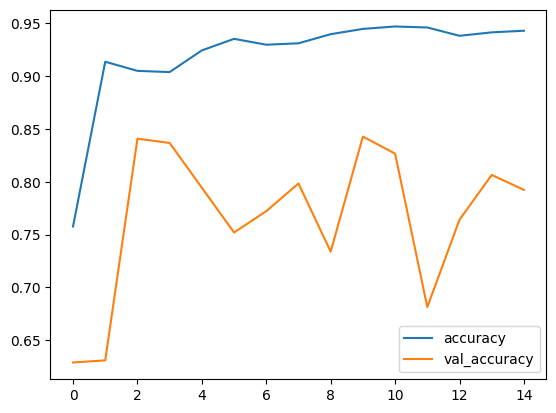

In [38]:
training_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(training_acc, label = 'accuracy')
plt.plot(val_acc, label = 'val_accuracy')
plt.legend()

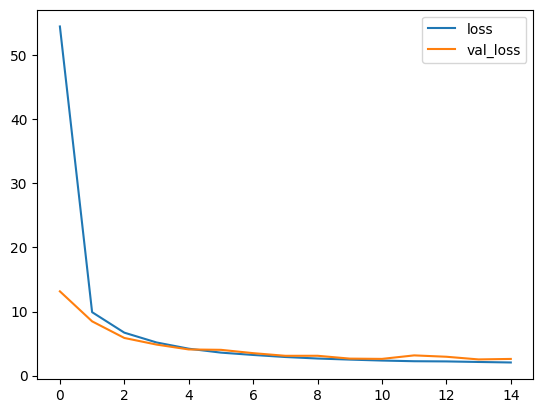

In [39]:
training_acc = history.history['loss']
val_acc = history.history['val_loss']

plt.plot(training_acc, label = 'loss')
plt.plot(val_acc, label = 'val_loss')
plt.legend()

In [40]:
train_loss, train_acc = model.evaluate(traning_ds)
test_loss, test_acc = model.evaluate(val_ds)

print("fianl train accuracy = {:.2f}, validation accuracy  = {:.2f}".format(train_acc*100, test_acc*100) )

8/8 [==============================] - 5s 112ms/step - loss: 2.7446 - accuracy: 0.7661
fianl train accuracy = 96.11, validation accuracy  = 76.61


In [59]:
model.save('model_pneu2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [41]:
import numpy as np

In [42]:
emotion_dict = {0: "Normal", 1: "Pneumonia"}

(150, 150, 3)
1/1 [==============================] - 0s 203ms/step
[0.8158649, 0.18413511]
Normal


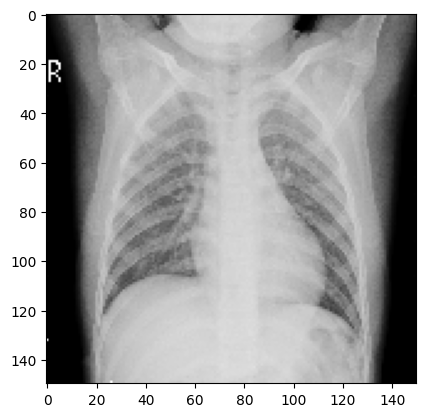

In [43]:
from keras.preprocessing import image

img = image.load_img("/content/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg",target_size = (150,150))
img = np.array(img)
plt.imshow(img)
print(img.shape) #prints (48,48) that is the shape of our image

img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,150,150,3)
result = model.predict(img)
result = list(result[0])
print(result)

img_index = result.index(max(result))
print(emotion_dict[img_index])
plt.show()

(150, 150, 3)
1/1 [==============================] - 0s 20ms/step
[0.003147511, 0.99685246]
Pneumonia


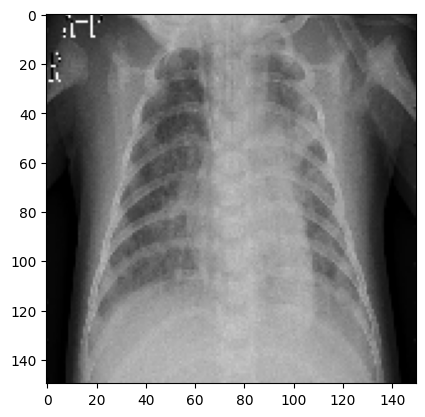

In [44]:
from keras.preprocessing import image

img = image.load_img("/content/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg",target_size = (150,150))
img = np.array(img)
plt.imshow(img)
print(img.shape) #prints (48,48) that is the shape of our image

img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,150,150,3)
result = model.predict(img)
result = list(result[0])
print(result)

img_index = result.index(max(result))
print(emotion_dict[img_index])
plt.show()

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

In [46]:
# Extract labels from the dataset
test_labels = []
for _, label_batch in test_ds:
    test_labels.extend(tf.argmax(label_batch, axis=1))

# Convert labels to numpy array
test_labels = tf.stack(test_labels).numpy()

# Print the labels
print(test_labels)

[0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0
 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0
 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0
 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0
 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0
 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1
 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1
 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0
 0 0 1 1 1 1 0 0 0 1 1 1 

In [47]:
test_labels

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,

In [48]:
y_pred = model.predict(test_ds)

10/10 [==============================] - 4s 124ms/step


In [49]:
y_pred

array([[9.4313419e-01, 5.6865819e-02],
       [2.3859325e-01, 7.6140672e-01],
       [2.1102643e-02, 9.7889733e-01],
       ...,
       [3.1892694e-05, 9.9996805e-01],
       [6.6047016e-04, 9.9933952e-01],
       [2.0359540e-03, 9.9796402e-01]], dtype=float32)

In [50]:
y_pred = y_pred.tolist()

In [51]:
y_pred

[[0.9431341886520386, 0.05686581879854202],
 [0.23859325051307678, 0.7614067196846008],
 [0.02110264264047146, 0.9788973331451416],
 [0.0025054309517145157, 0.9974945783615112],
 [2.19121175177861e-05, 0.9999780654907227],
 [0.004702666774392128, 0.995297372341156],
 [6.826956814620644e-05, 0.9999316930770874],
 [0.7357906103134155, 0.2642093896865845],
 [0.0003308304294478148, 0.9996691942214966],
 [2.9083967092446983e-05, 0.9999709129333496],
 [0.05570993945002556, 0.944290041923523],
 [0.002781457966193557, 0.9972184896469116],
 [0.02963404171168804, 0.9703659415245056],
 [0.932141900062561, 0.06785811483860016],
 [0.030757149681448936, 0.9692428708076477],
 [5.263069033389911e-05, 0.9999473094940186],
 [0.8128786683082581, 0.18712134659290314],
 [0.9621638059616089, 0.03783618286252022],
 [0.0003767361049540341, 0.9996232986450195],
 [8.261115726782009e-05, 0.9999173879623413],
 [0.8976243138313293, 0.10237572342157364],
 [0.6130448579788208, 0.3869551122188568],
 [0.97310829162597

In [52]:
result = []
for img in y_pred:
  img_index = img.index(max(img))
  result.append(img_index)


result

[0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,


In [53]:
y_pred = np.array(result)


In [54]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [55]:
accuracy = accuracy_score(y_pred, test_labels)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 55.93%


In [56]:
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

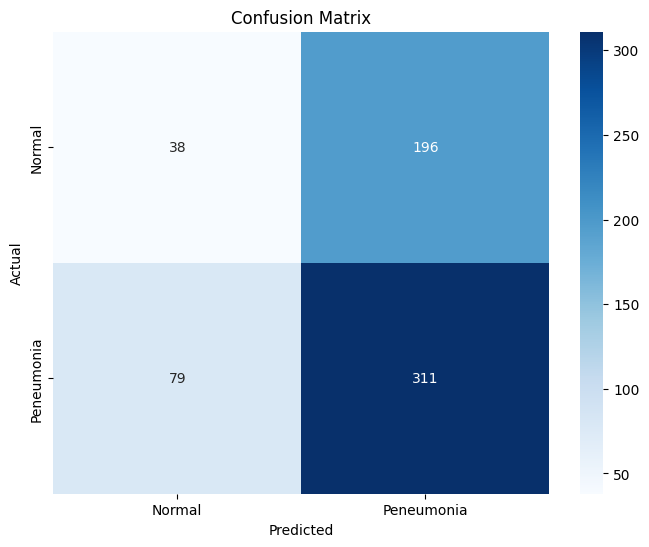

In [57]:
plot_confusion_matrix(test_labels, y_pred, class_names=["Normal", "Peneumonia"])

10/10 [==============================] - 4s 123ms/step


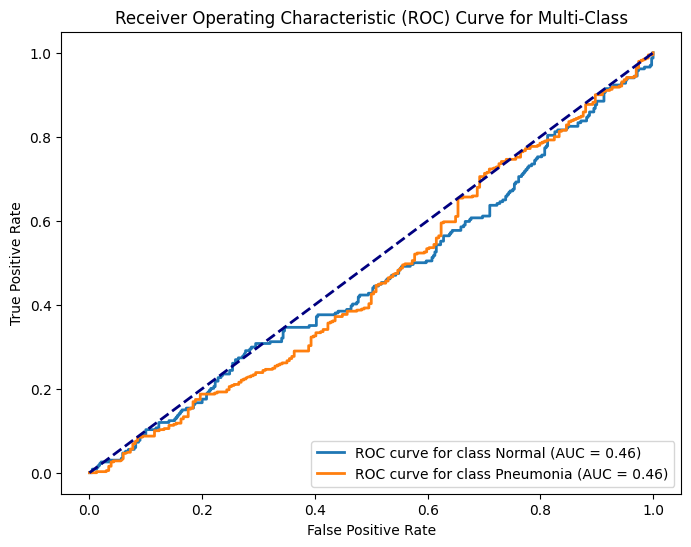

In [58]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import  roc_curve, auc

# Predict probabilities for each class
y_probs = model.predict(test_ds)
class_names=["Normal", "Pneumonia"]
# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(test_labels == i, y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve for class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc='lower right')
plt.show()

In [ ]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,